In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
from pathlib import Path

In [5]:
data_dir = Path("../Data/yfinance_data")

tickers_path = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
tickers = ['AAPL', 'AMZN', 'GOOGL', 'FB', 'MSF', 'NVDA', 'TSLA']
stock_data = {}

for ticker in tickers_path:
    df = pd.read_csv(data_dir / f"{ticker}_historical_data.csv", parse_dates=['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    stock_data[ticker] = df


In [6]:
for ticker, df in stock_data.items():
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_Signal'] = macdsignal


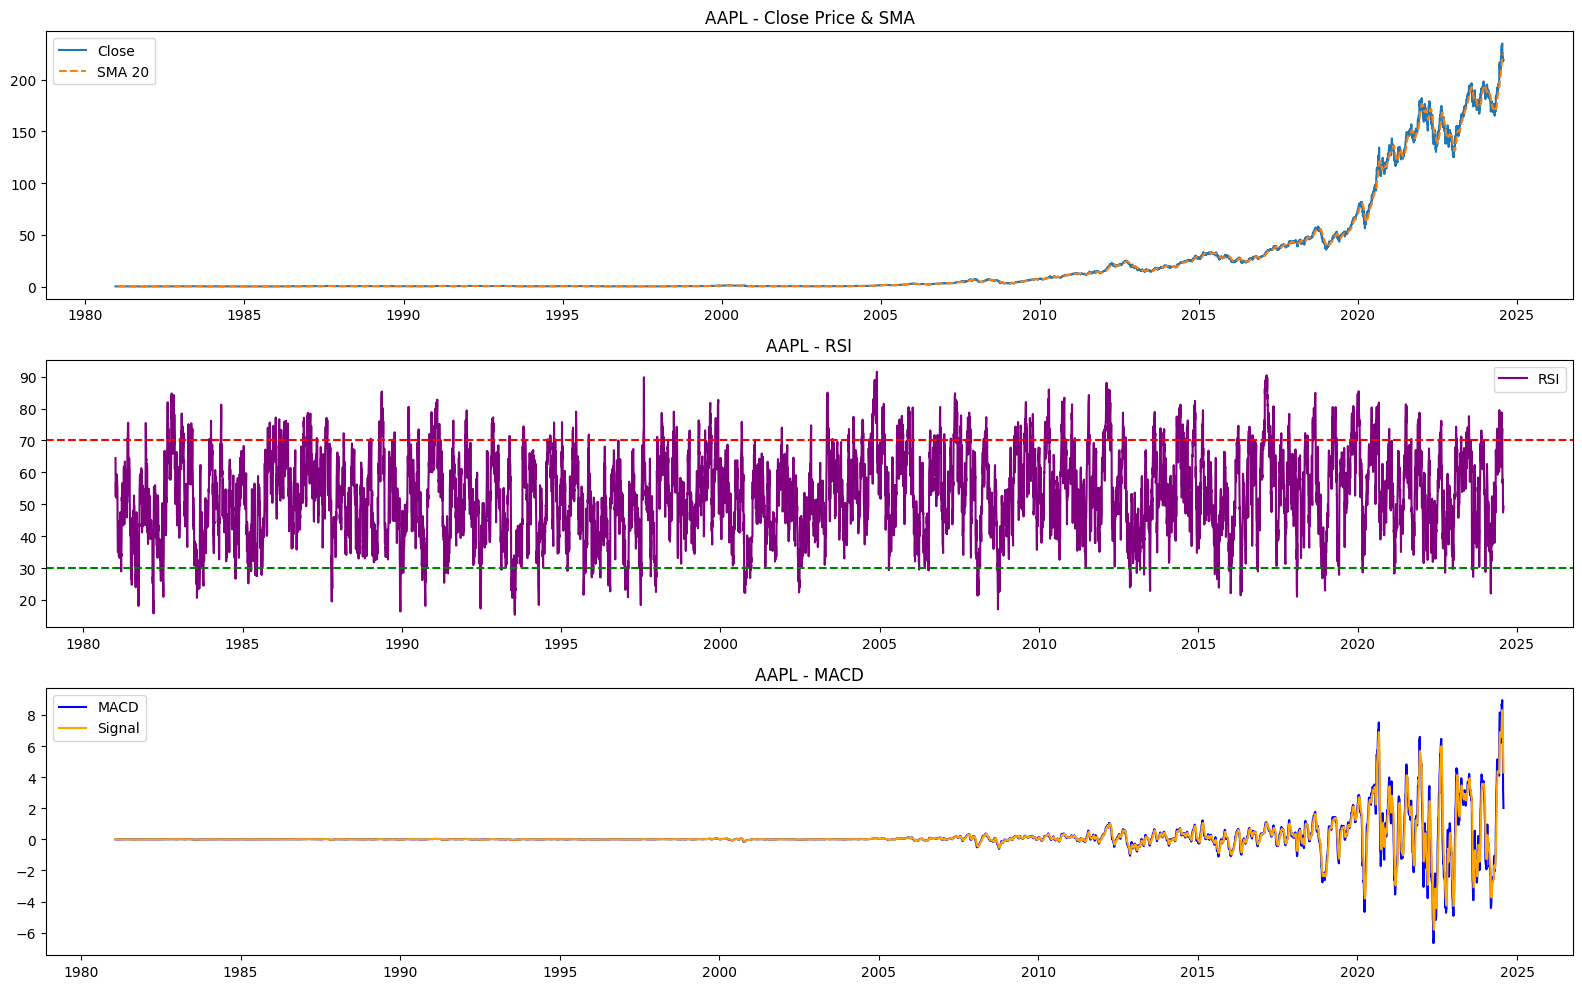

In [8]:
def plot_indicators(df, ticker):
    plt.figure(figsize=(16, 10))

    # Plot Close Price and SMA
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['Close'], label='Close')
    plt.plot(df.index, df['SMA_20'], label='SMA 20', linestyle='--')
    plt.title(f"{ticker} - Close Price & SMA")
    plt.legend()

    # Plot RSI
    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red')
    plt.axhline(30, linestyle='--', color='green')
    plt.title(f"{ticker} - RSI")
    plt.legend()

    # Plot MACD
    plt.subplot(3, 1, 3)
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['MACD_Signal'], label='Signal', color='orange')
    plt.title(f"{ticker} - MACD")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_indicators(stock_data['AAPL'], 'AAPL')
